<a href="https://colab.research.google.com/github/sahug/time-series/blob/main/TSA%20-%20Basics%20-%20Decomposition%20and%20Random%20Walks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TSA - Basics - Decomposition and Random Walks**

**Import Datasets**

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231
!kaggle datasets download -d selfishgene/historical-hourly-weather-data

  0% 0.00/3.03M [00:00<?, ?B/s]
100% 3.03M/3.03M [00:00<00:00, 176MB/s]
 75% 9.00M/12.0M [00:00<00:00, 71.9MB/s]
100% 12.0M/12.0M [00:00<00:00, 89.2MB/s]


**Unzip**

In [5]:
import zipfile
with zipfile.ZipFile("/content/stock-time-series-20050101-to-20171231.zip", "r") as zip:
  zip.extractall("/content/")

**Load Dataset**

In [6]:
import pandas as pd

In [102]:
google = pd.read_csv("/content/GOOGL_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date'])
microsoft = pd.read_csv("/content/MSFT_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date'])

In [21]:
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


**Data Preperation**

In [11]:
google.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

**Visualization**

In [ ]:
import matplotlib.pyplot as plt

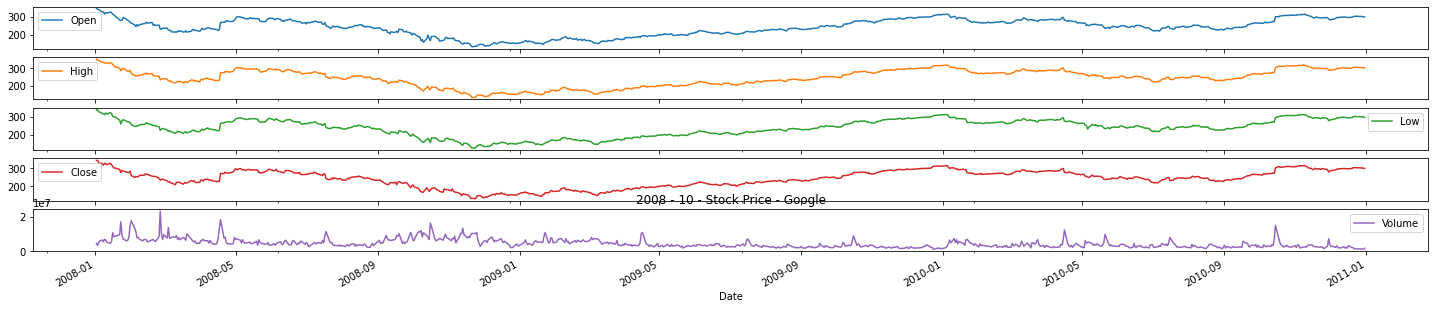

In [55]:
google["2008":"2010"].plot(subplots=True, figsize=(25, 5))
plt.title("2008 - 10 - Stock Price - Google")
plt.show()

**Trends, Seasonality and Noise**

These are the components of a time series

- **Trend** - Consistent upwards or downwards slope of a time series
- **Seasonality** - Clear periodic pattern of a time series(like sine funtion)
- **Noise** - Outliers or missing values

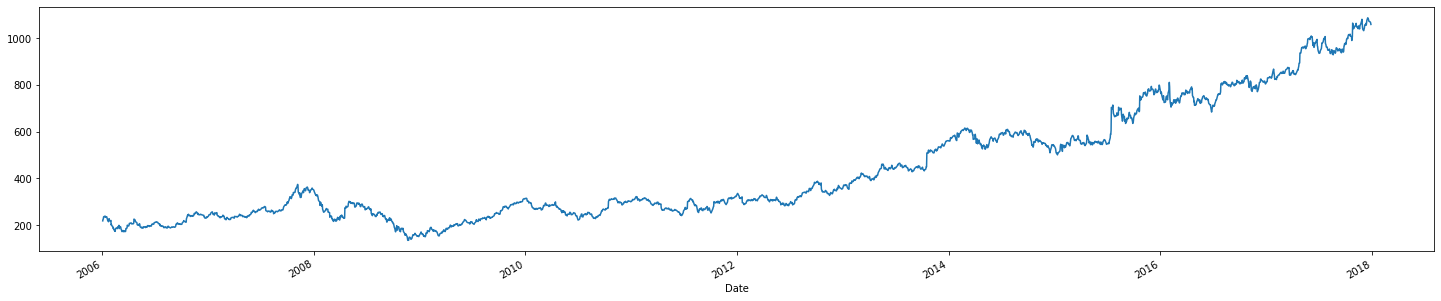

In [84]:
google["High"].plot(figsize=(25,5))

**Decomposition**

In [86]:
from pylab import rcParams
import statsmodels.api as sm

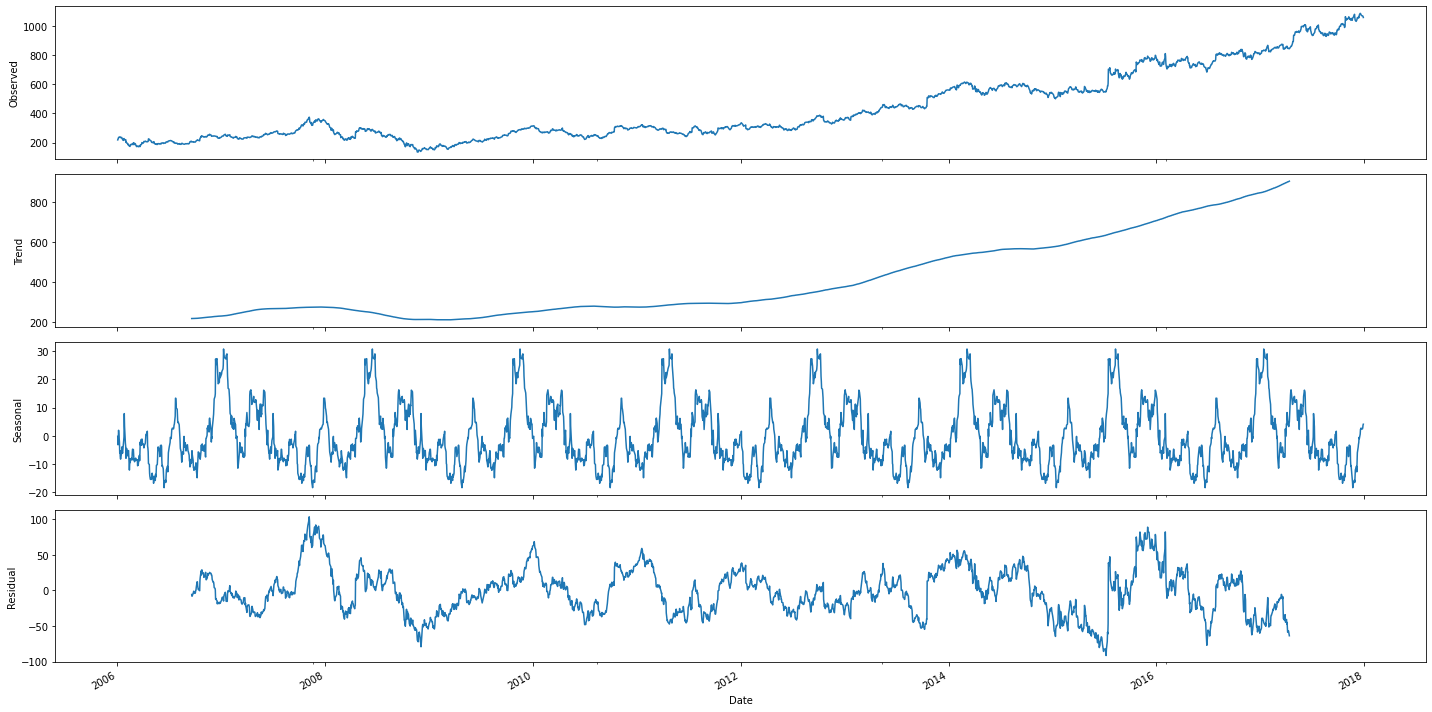

In [92]:
rcParams['figure.figsize'] = 11, 9

# The frequncy is annual
plt.rc("figure", figsize=(20, 10))
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=360) 
figure = decomposed_google_volume.plot()
plt.show()

**White Noise**

White noise has

- Constant Mean
- Constant Variance
- Zero Auto-Correlation at all lags

In [94]:
import numpy as np

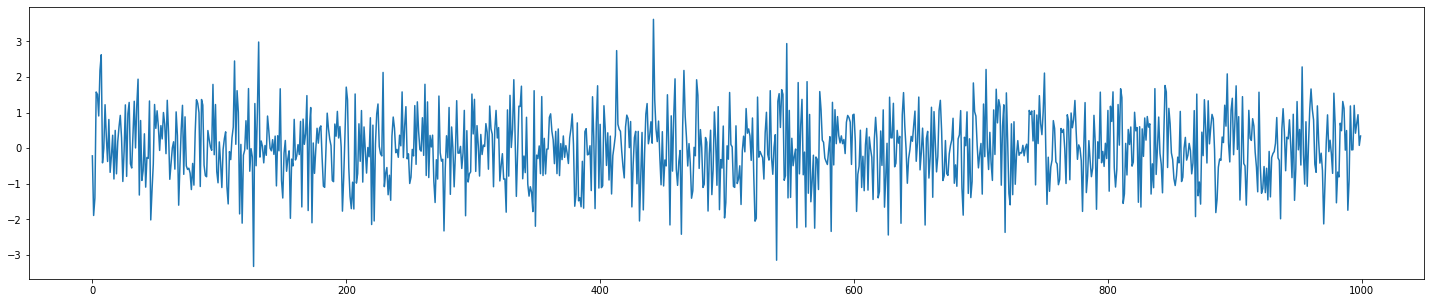

In [95]:
rcParams['figure.figsize'] = 25, 5
white_noise = np.random.normal(loc=0, scale=1, size=1000)
plt.plot(white_noise)

**Autocorrelation of White Noise**

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

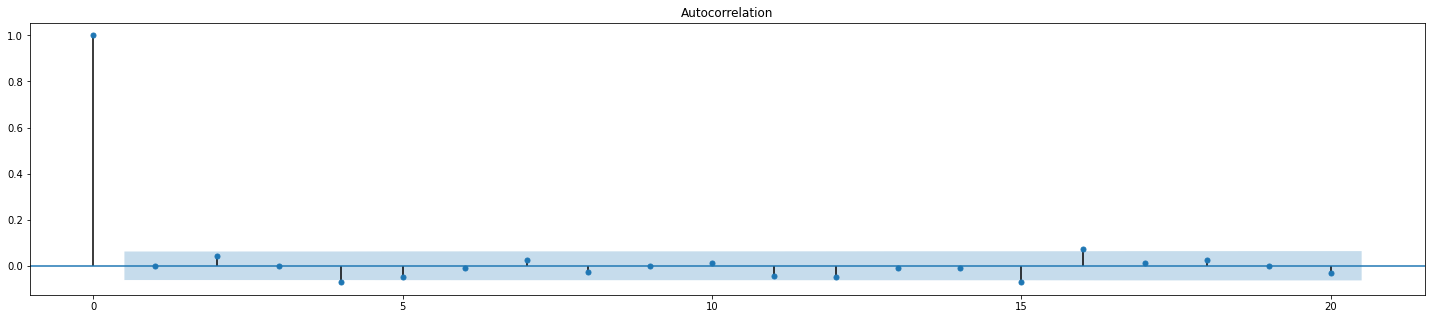

In [96]:
plot_acf(white_noise,lags=20)
plt.show()

**Random Walk**

A Random Walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

**Augmented Dickey-Fuller Test**

An Augmented Dickey–Fuller Test (ADF) tests the Null Hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller Test with more lagged changes on RHS.

In [99]:
from statsmodels.tsa.stattools import adfuller

In [100]:
adf = adfuller(microsoft["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(google["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of microsoft: 0.00032015252776520207
p-value of google: 6.510719605768194e-07


**Generate a Random Walk**

In [103]:
from numpy.random import normal, seed

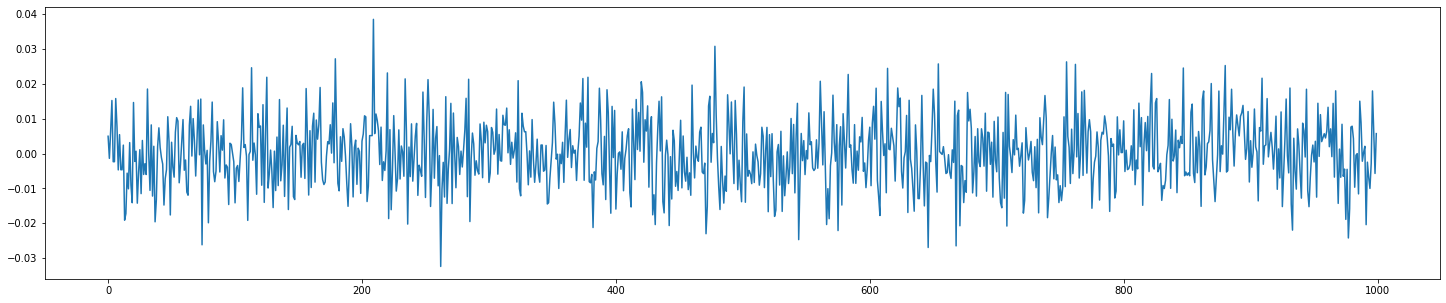

In [104]:
seed(42)
rcParams['figure.figsize'] = 25, 5
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [106]:
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

In [107]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

**Stationarity**

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

- **Strong Stationarity**: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
- **Weak Stationarity**: is a process where mean, variance, autocorrelation are constant throughout the time

**Stationarity** is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

**Non - Stationary Plot**

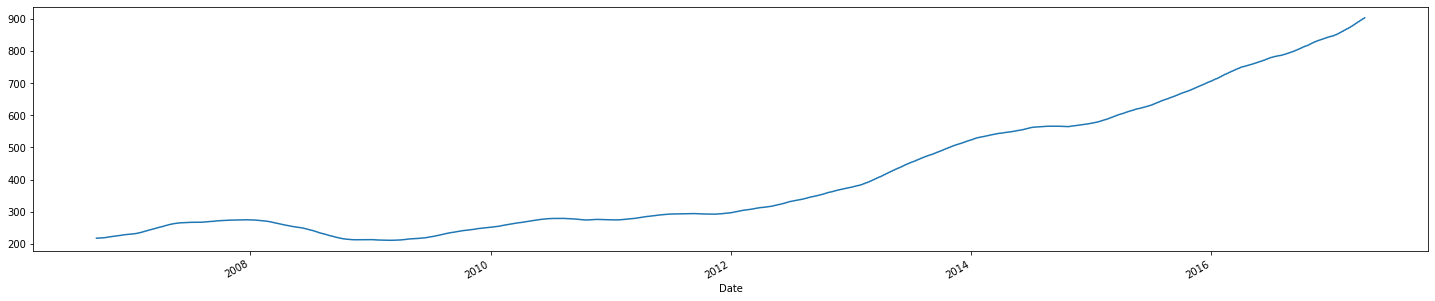

In [108]:
decomposed_google_volume.trend.plot()

**Stationary Plot**

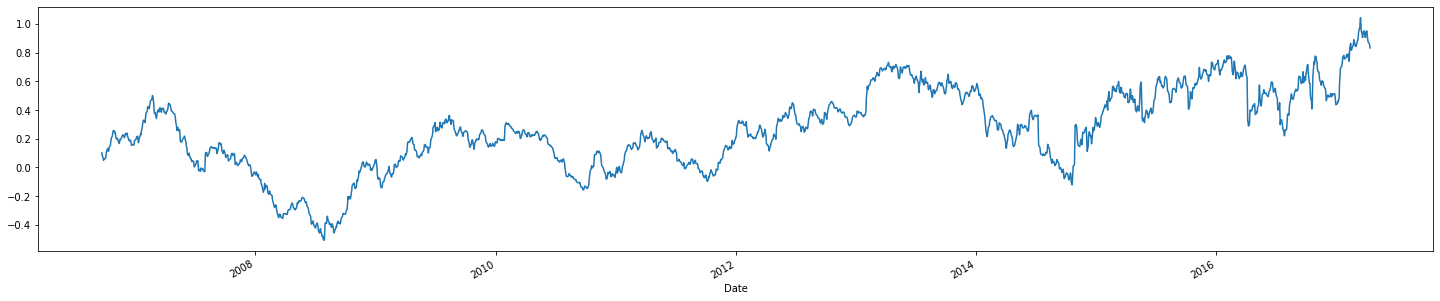

In [109]:
decomposed_google_volume.trend.diff().plot()